<a href="https://colab.research.google.com/github/sp-moribito/pythonbasic/blob/main/py210614.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
sess=tf.Session()
hello=tf.constant('hello')
print(sess.run(hello))

# tensorflow 1.버전대라서 아래와 같은 오류 발생

AttributeError: ignored

In [ ]:
# tensorflow 2.버전대는 아래와 같이 사용한다

import tensorflow as tf

with tf.compat.v1.Session() as sess:
  hello=tf.constant('Kimjaehong')
  print(sess.run(hello))

b'Kimjaehong'


In [ ]:
import tensorflow as tf
import numpy as np

x = np.random.sample((100,3)) # 난수 생성
dataset = tf.data.Dataset.from_tensor_slices(x)

NameError: ignored

In [ ]:
import tensorflow_datasets as tfds
ds=tfds.load('mnist',split='train',shuffle_files=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
import tensorflow as tf
data_train, data_test = tf.keras.datasets.mnist.load_data()
(images_train, labels_train) = data_train
(images_test, labels_test) = data_test

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
import tensorflow as tf
url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/butler.txt'
text_path = tf.keras.utils.get_file("butler.txt", origin=url)

811008/807992 [==============================] - 0s 0us/step


In [ ]:
log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train,
          y=y_train,
          epochs=5,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

NameError: ignored

In [ ]:
# 199100199

# 1st   199100199   1   99100199    []
# 2nd   99100199    9   9100199     [1]   
# 3rd   9100199     9*  100199      [1,9]   : 여기까지는 기존의 방법과 다르지 않다.
# 4th   9100199     91* 00199       [1,9]   : 둘의 합이 다르다
# 5th   9100199     910* 0199       [1,9]   : 둘의 합이
# 6th   9100199     9100* 199       [1,9]   : 둘의 합이
# 7th   9100199     91001* 99       [1,9]   : 둘의 합이
# 8th   9100199     910019* 9       [1,9]   : 둘의 합이
# 9th   9100199     9100199         [1,9]   : 둘의 합이

# 10th  99100199    1   99100199    [1]   : 다시 진행한다
# 11th  99100199    9   99100199    [1,9]   :
# 12th  9100199     99  99100199    [1,99]   : 이번에는 숫자 2개로 진행한다

# ...                               [1,99,100]

# ...                               [1,99,100,199]


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

In [11]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv('car_evaluation.csv', names=cols, header=None)

In [12]:
print(cars)

      price  maint  doors persons lug_capacity safety output
0     vhigh  vhigh      2       2        small    low  unacc
1     vhigh  vhigh      2       2        small    med  unacc
2     vhigh  vhigh      2       2        small   high  unacc
3     vhigh  vhigh      2       2          med    low  unacc
4     vhigh  vhigh      2       2          med    med  unacc
...     ...    ...    ...     ...          ...    ...    ...
1723    low    low  5more    more          med    med   good
1724    low    low  5more    more          med   high  vgood
1725    low    low  5more    more          big    low  unacc
1726    low    low  5more    more          big    med   good
1727    low    low  5more    more          big   high  vgood

[1728 rows x 7 columns]


In [14]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


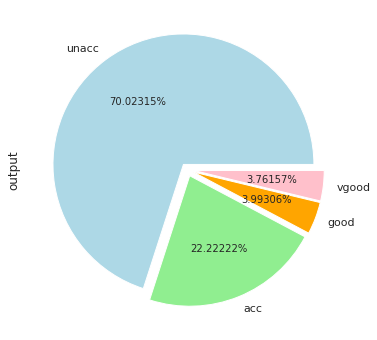

In [13]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05,0.05,0.05,0.05))

In [16]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis=1)
y = labels.values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 1s 3ms/step - loss: 0.9815 - acc: 0.6181 - val_loss: 0.8221 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 0s 2ms/step - loss: 0.6054 - acc: 0.7529 - val_loss: 0.6327 - val_acc: 0.7184
Epoch 3/50
139/139 [==============================] - 0s 2ms/step - loss: 0.4491 - acc: 0.8154 - val_loss: 0.5060 - val_acc: 0.8123
Epoch 4/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3531 - acc: 0.8706 - val_loss: 0.4219 - val_acc: 0.8412
Epoch 5/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2972 - acc: 0.8896 - val_loss: 0.3695 - val_acc: 0.8448
Epoch 6/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2579 - acc: 0.8995 - val_loss: 0.3383 - val_acc: 0.8448
Epoch 7/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2265 - acc: 0.9149 - val_loss: 0.3005 - val_acc: 0.8700
Epoch 8/50
139/139 [==============================] - 0s 2ms/step - loss: 0.

In [20]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 1ms/step - loss: 0.0559 - acc: 0.9884
Test Score: 0.05593185871839523
Test Accuracy: 0.9884393215179443
